In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
sns.set()
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, f1_score  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 

# Tamanho default das figuras
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

In [ ]:
incidents_timing = pd.read_csv('state_date_level.csv')
gun_laws = pd.read_csv('gun_laws.csv')

In [ ]:
incidents_by_state = []
yearly_incidents = incidents_timing.loc[incidents_timing['Date'].str.contains("2019-")]

states = list(set(incidents_timing['State']))
states.remove("High")

for state in states:
  incidents_by_state.append(len(yearly_incidents.loc[incidents_timing['State'].str.contains(state)]))

incidents_data = pd.DataFrame(
  {
    "state": states,
    "incidents": incidents_by_state
  })

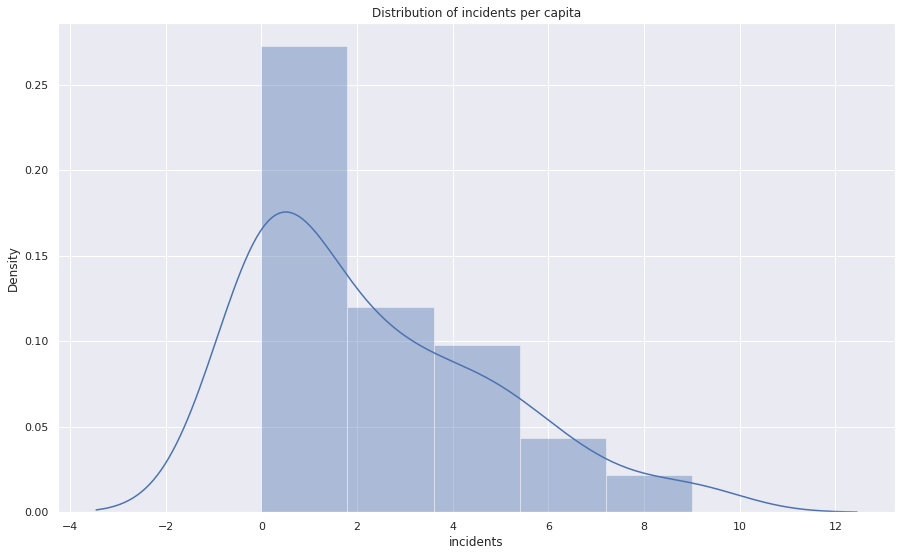

In [ ]:
sns.distplot(incidents_data['incidents'])
plt.title('Distribution of incidents per capita')
plt.show()

In [ ]:
def mean(L):
    t = 0
    for i in L:
        t += i
    return t/len(L)

def map_classes_estado(incidentes_per_capita):
    if incidentes_per_capita < 3:
        return 'low'
    elif incidentes_per_capita < 8:
        return 'med'
    elif incidentes_per_capita >= 8:
        return 'high'

knn_tests = 1000

In [ ]:
knn_f1_results = []
for i in range(knn_tests):
    # Classify each state by number of incidents
    incidents_data['class'] = incidents_data['incidents'].map(map_classes_estado)

    # Create labeled dataset
    gun_laws_class = pd.merge(incidents_data[['state', 'class']], gun_laws, on='state')

    # Split train and test sets
    y = gun_laws_class['class']
    X = gun_laws_class.drop(['state', 'class'], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    # Train
    classifier = KNeighborsClassifier(n_neighbors=3)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    
    knn_f1_results.append(f1_score(y_test, y_pred, average='weighted'))
print('Last iteration results:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))

print('F1:', f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))

Last iteration results:
[[ 11   0   0]
 [  0 175   7]
 [  0   8  99]]
              precision    recall  f1-score   support

        high       1.00      1.00      1.00        11
         low       0.96      0.96      0.96       182
         med       0.93      0.93      0.93       107

    accuracy                           0.95       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.95      0.95      0.95       300

F1: 0.9499511222586661


In [ ]:
mean(knn_f1_results)

0.9543859260415046

In [ ]:
tree_f1_results = []
for i in range(knn_tests):
    # Classify each state by number of incidents
    incidents_data['class'] = incidents_data['incidents'].map(map_classes_estado)

    # Create labeled dataset
    gun_laws_class = pd.merge(incidents_data[['state', 'class']], gun_laws, on='state')

    # Split train and test sets
    y = gun_laws_class['class']
    X = gun_laws_class.drop(['state', 'class'], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    # Train
    classifier = tree.DecisionTreeClassifier()
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    
    tree_f1_results.append(f1_score(y_test, y_pred, average='weighted'))
print('Last iteration results:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))

print('F1:', f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))

Last iteration results:
[[ 14   0   0]
 [  0 172   0]
 [  0   0 114]]
              precision    recall  f1-score   support

        high       1.00      1.00      1.00        14
         low       1.00      1.00      1.00       172
         med       1.00      1.00      1.00       114

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

F1: 1.0


In [ ]:
mean(tree_f1_results)

0.9860545595310283

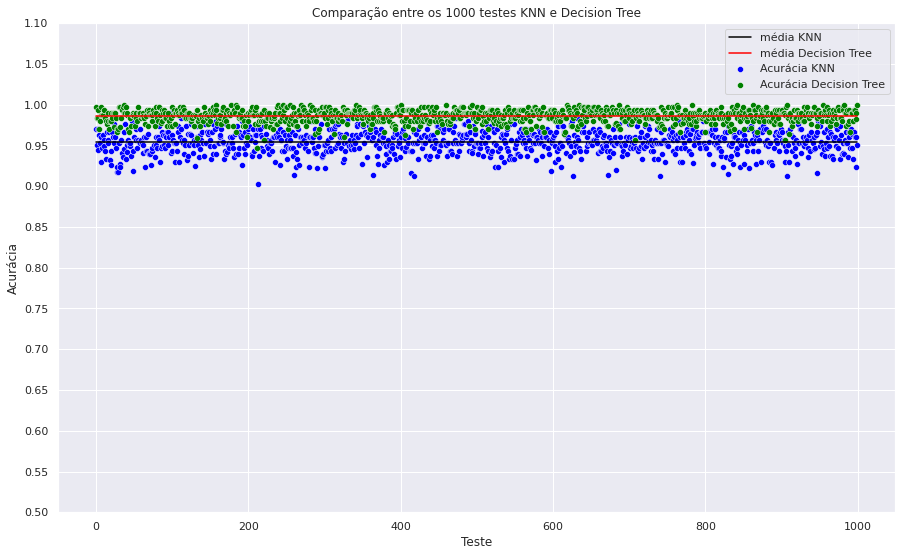

In [ ]:
sns.scatterplot(x=[i for i in range(knn_tests)] , y=knn_f1_results, label='Acurácia KNN', color='Blue')
sns.scatterplot(x=[i for i in range(knn_tests)] , y=tree_f1_results, label='Acurácia Decision Tree', color='Green')

# Média
sns.lineplot(x=[i for i in range(knn_tests)], y=[mean(knn_f1_results) for i in range(knn_tests)], color='Black', 
             label='média KNN')
sns.lineplot(x=[i for i in range(knn_tests)], y=[mean(tree_f1_results) for i in range(knn_tests)], color='Red', 
             label='média Decision Tree')

plt.title(f'Comparação entre os {knn_tests} testes KNN e Decision Tree')
plt.xlabel('Teste')
plt.ylabel('Acurácia')

plt.yticks(np.arange(0.5, 1.1, 0.05))
plt.show()